#  Акции

В этом задании мы немного поработаем с ценами на акции. 

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков

В табличке `prices.tsv` лежат данные о том как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по каждой из ценных бумаг.  Подгрузим эти таблицы и посмотрим на них. 

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=11exsKUv4RWKj3AUHJYtbPvlx_mIswLqZ' -O 'information.tsv'
!wget 'https://drive.google.com/u/0/uc?id=1qMcgwRaOTSZlzvPDRdGQAzxggTEnGR2P' -O 'price.tsv'

In [1]:
df_prices = pd.read_csv('price.tsv', sep='\t')

# сделали дату индексом таблицы и применили это преобразование
df_prices.set_index('Date', inplace=True)  
df_prices.head()

                    A        AAL        AAP       AAPL  ...   ZBRA       ZION  ZM  ZTS
Date                                                    ...                           
2010-08-02  18.982769  10.030768  51.945328  32.324974  ...  27.59  20.329309 NaN  NaN
2010-08-03  18.337280  10.049624  51.148121  32.334858  ...  27.40  20.080635 NaN  NaN
2010-08-04  18.633682   9.455699  51.877274  32.464500  ...  28.09  20.089518 NaN  NaN
2010-08-05  18.745655   9.088029  52.373096  32.306469  ...  30.35  19.636568 NaN  NaN
2010-08-06  18.923494   8.946616  51.284237  32.107712  ...  30.24  19.227848 NaN  NaN

[5 rows x 523 columns]

In [2]:
df_inf = pd.read_csv('information.tsv', sep='\t')
df_inf.head()

  Symbol                  Security SEC filings  ... S&P-500 NASDAQ    DJI
0      A  Agilent Technologies Inc     reports  ...    True  False  False
1    AAL   American Airlines Group     reports  ...    True  False  False
2    AAP        Advance Auto Parts     reports  ...    True  False  False
3   AAPL                Apple Inc.     reports  ...    True   True   True
4   ABBV               AbbVie Inc.     reports  ...    True  False  False

[5 rows x 12 columns]

> Давайте решим пробную задачку, чтобы вы понимали, как устроена система тестирования. 

В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? Запишите результат в пременную `n_nasdaq`.

In [3]:
n_nasdaq = df_inf['NASDAQ'].sum() # каждое True это 1, а False 0
n_nasdaq

103

Все ваши расчёты будут тестироваться с помощью вот таких тестов. 

In [ ]:
assert n_nasdaq == 103

__а)__ Теперь настоящее задание. Сколько ценных бумаг входят во все три индекса сразу?

In [ ]:
n_sp = 0

for _, row in df_inf.iterrows():
    if row['NASDAQ'] and row['S&P-500'] and row['DJI']:
        n_sp += 1

In [ ]:
# проверка, что задание решено корректно
assert n_sp < 10

__б)__ В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [ ]:
n_founded = 0
for _, row in df_inf.iterrows():
    if row['S&P-500'] and row['Founded'] <= 1900:
        n_founded += 1

In [ ]:
# проверка, что задание решено корректно
assert n_founded < 100

__в)__  В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных? Все пропуски в этой колонке удалите методом `.dropna()`. 

In [ ]:
df_inf.dropna(how='all', subset=['GICS Sector'], inplace=True)
n_sectors = df_inf['GICS Sector'].nunique()

In [ ]:
# проверка, что задание решено корректно
assert n_sectors > 5
assert n_sectors < 15

__г)__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора? 

In [ ]:
top3_sectors = df_inf['GICS Sector'].value_counts().nlargest(3).keys()
n_top3  = 0
for _, row in df_inf.iterrows():
    if row['S&P-500'] and row['GICS Sector'] in top3_sectors:
        n_top3 += 1

In [ ]:
# проверка, что задание решено корректно
assert n_top3 < 300
assert n_top3 > 200

__д)__ У скольки компаний тикер (краткое название из колонки `Symbol`) состоит из трёх букв? 

In [ ]:
n_ticker  = df_inf['Symbol'].apply(len).eq(3).sum() # запишите результат в переменную n_ticker

In [ ]:
# проверка, что задание решено корректно
assert n_ticker > 300

А из другого количества букв? Заведите колонку `letter_count` с числом букв в тикере, а после подсчитайте как часто в ней встречаются разные значения. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

letter_count = df_inf['Symbol'].apply(len).value_counts()

Создайте в таблице новую колонку `first_letter`. Запишите туда первую букву каждого тикера из колонки `Symbol`. Какая буква встречается на первом месте чаще всего? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

popular_letter = df_inf['Symbol'].apply(lambda sym: sym[0]).value_counts().head(1)[0] # запишите результат в переменную popular_letter

# your code here

In [ ]:
# проверка, что задание решено корректно
assert popular_letter != 'T'

__е)__ Теперь поработаем со стоимостью акций. 

- Из таблицы `df_inf` возьмите колонку `Symbol` и сохраните значения из неё, `.values`, в вектор tickers
- Выберите из вектора 10 случайных тикеров командой `np.random.choice`, опцию `replace` установить в `False`, нам нужна выборка без повторений

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tickers = df_inf['Symbol']
tickers10 = np.random.choice(tickers, 10, replace=False)

In [ ]:
# проверка, что задание решено корректно
assert tickers.size > 500

Методом `.plot` постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у `.plot()` допишите `figsize=(12,7)`, чтобы отрегулировать размер картинки.

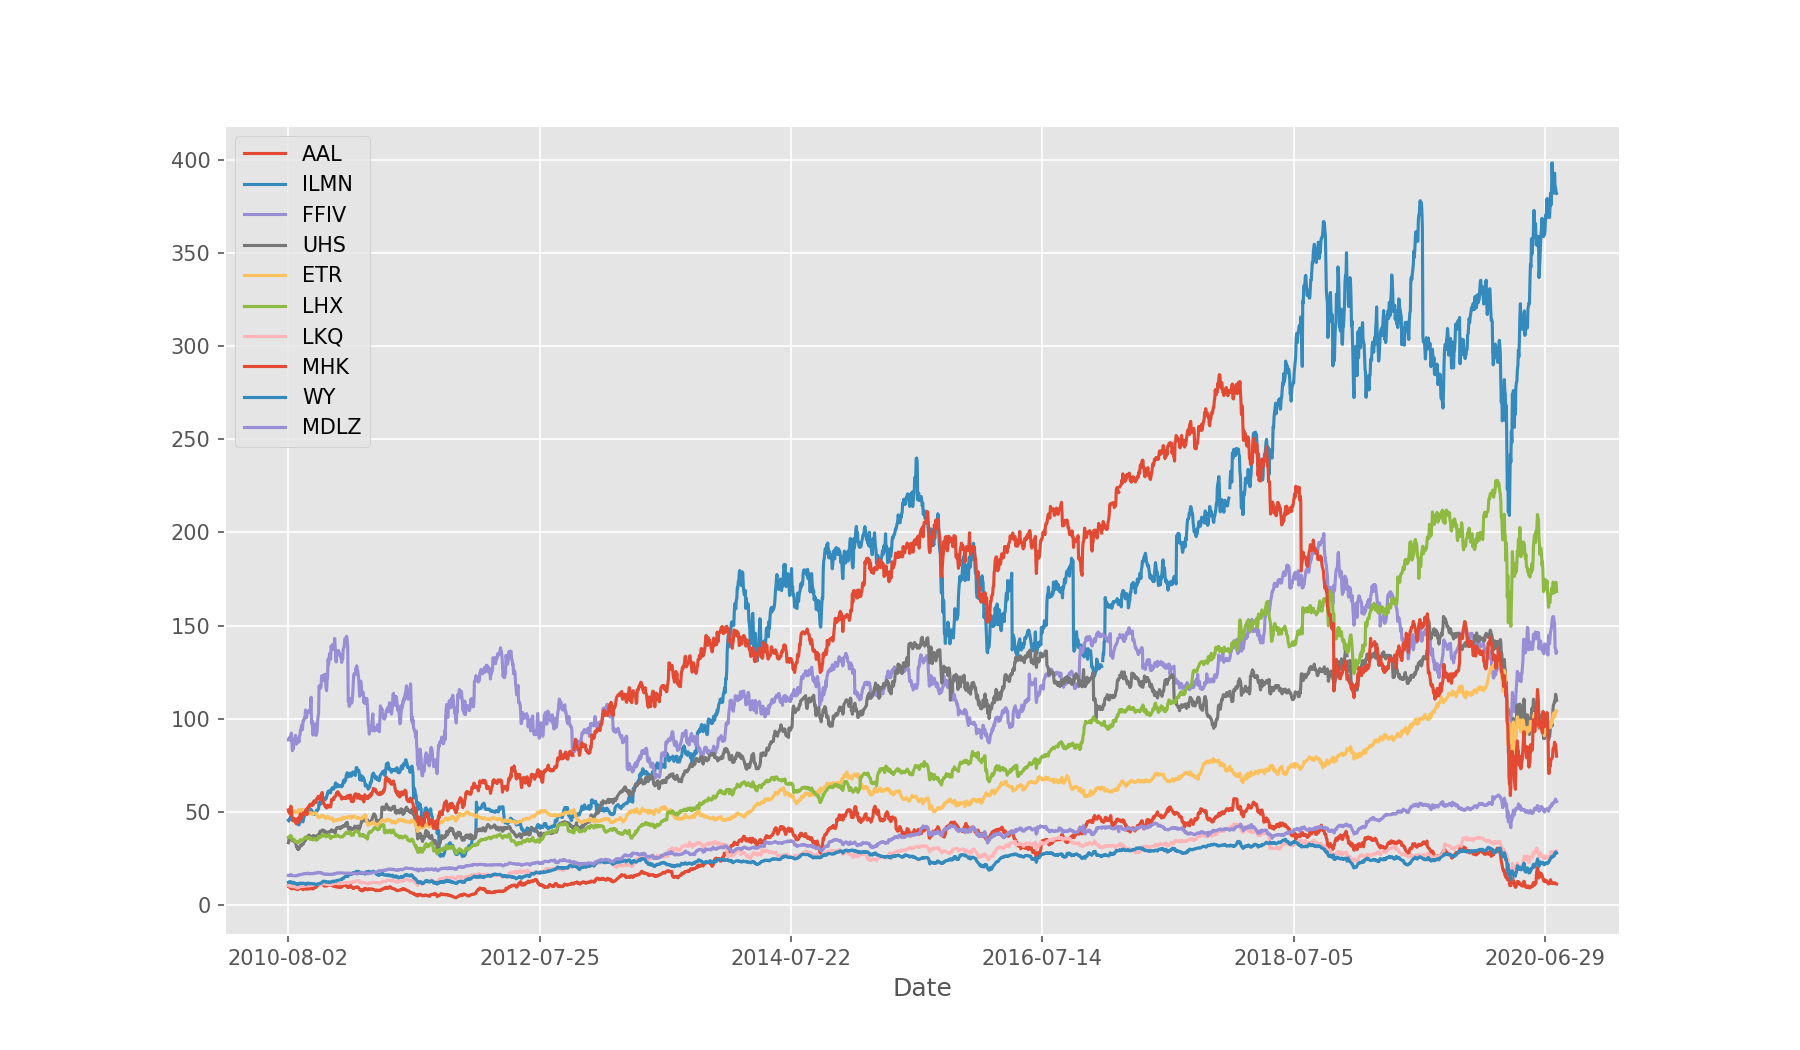

<AxesSubplot: xlabel='Date'>

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_tickers10_prices = df_prices.filter(tickers10)
df_tickers10_prices.plot(figsize=(12, 7))

Методом `.hist()` постройте для этих цен гистограммы. Выберите количество бинов `bins` равное $25$, опцию `density` поставьте в `True`. Это отнормирует высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

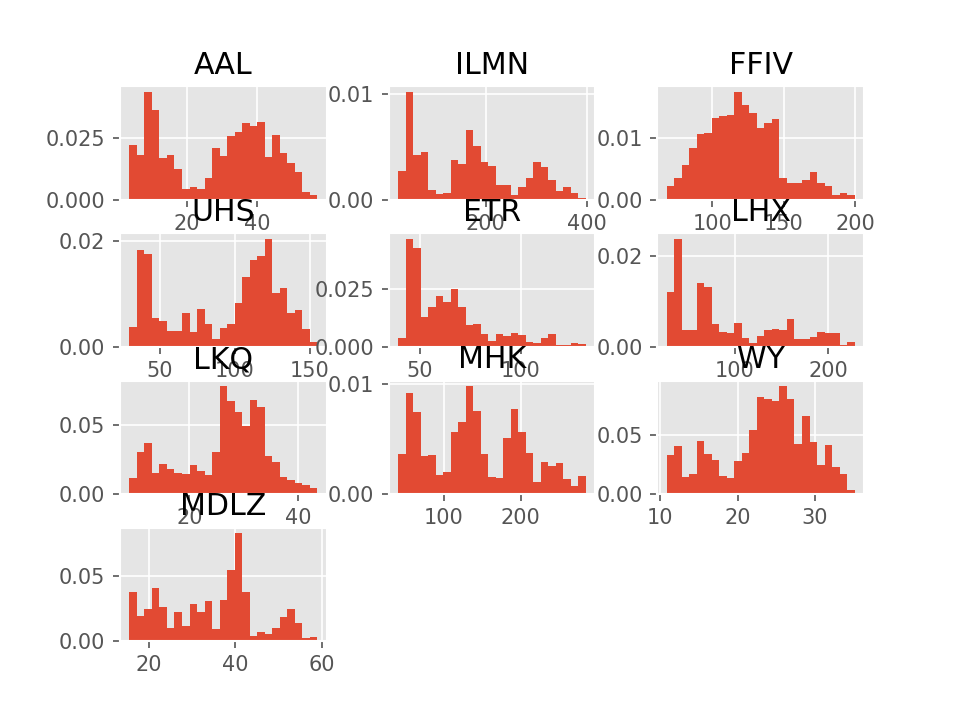

array([[<AxesSubplot: title={'center': 'AAL'}>,
        <AxesSubplot: title={'center': 'ILMN'}>,
        <AxesSubplot: title={'center': 'FFIV'}>],
       [<AxesSubplot: title={'center': 'UHS'}>,
        <AxesSubplot: title={'center': 'ETR'}>,
        <AxesSubplot: title={'center': 'LHX'}>],
       [<AxesSubplot: title={'center': 'LKQ'}>,
        <AxesSubplot: title={'center': 'MHK'}>,
        <AxesSubplot: title={'center': 'WY'}>],
       [<AxesSubplot: title={'center': 'MDLZ'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_tickers10_prices.hist(bins=25, density=True)

# your code here

- Как скорее всего распределена стоимость акций?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_prices_d = df_prices.diff()
df_prices_sh = df_prices.shift(1)

df_r = df_prices.diff() / df_prices.shift(1) # запишите сюда новую таблицу
df_r.drop(df_r.index[0], inplace=True)

In [ ]:
# проверка, что задание решено корректно
assert df_r.iloc[0,0] < 1

Методом `.plot` постройте для выбранных ранее 10  случайных тикеров картинку с динамикой доходностей. 

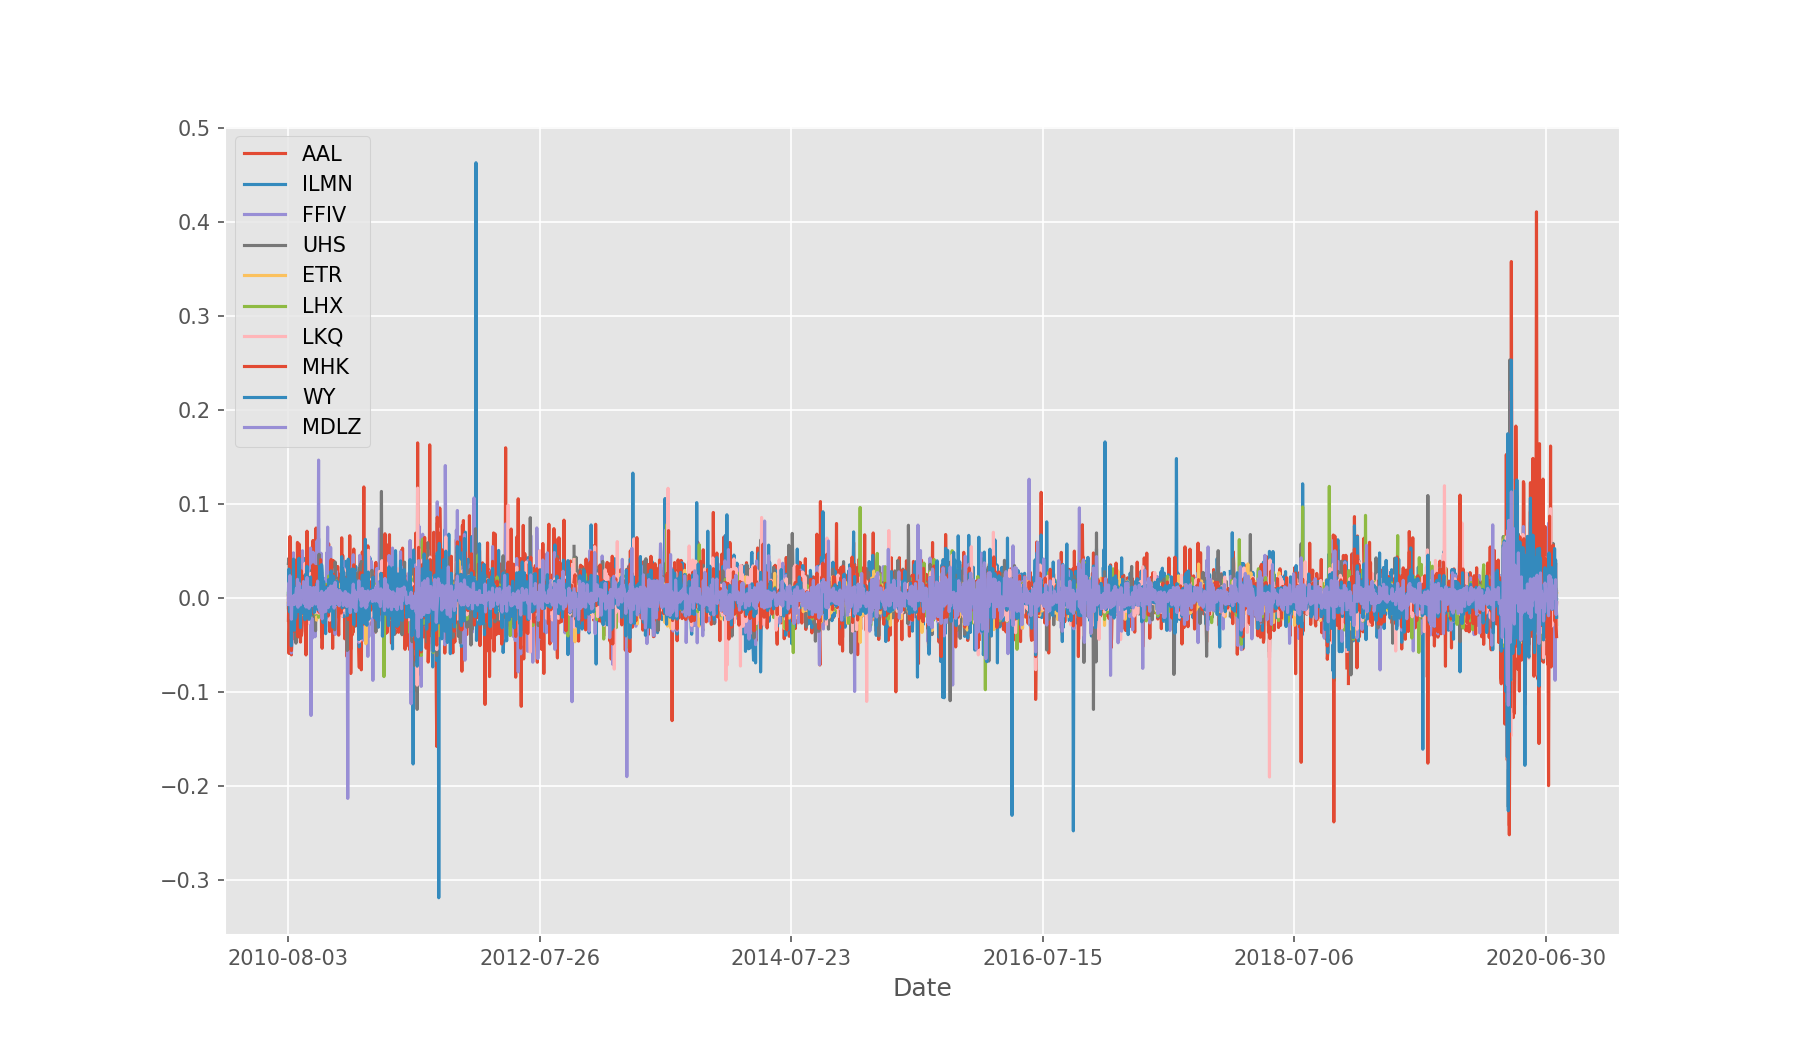

<AxesSubplot: xlabel='Date'>

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_tickers10_r = df_tickers10_prices.diff() / df_tickers10_prices.shift(1)
df_tickers10_r.drop(df_tickers10_r.index[0], inplace=True)

df_tickers10_r.plot(figsize=(12, 7))

Постройте для доходностей этих десяти тикеров гистограммы. 

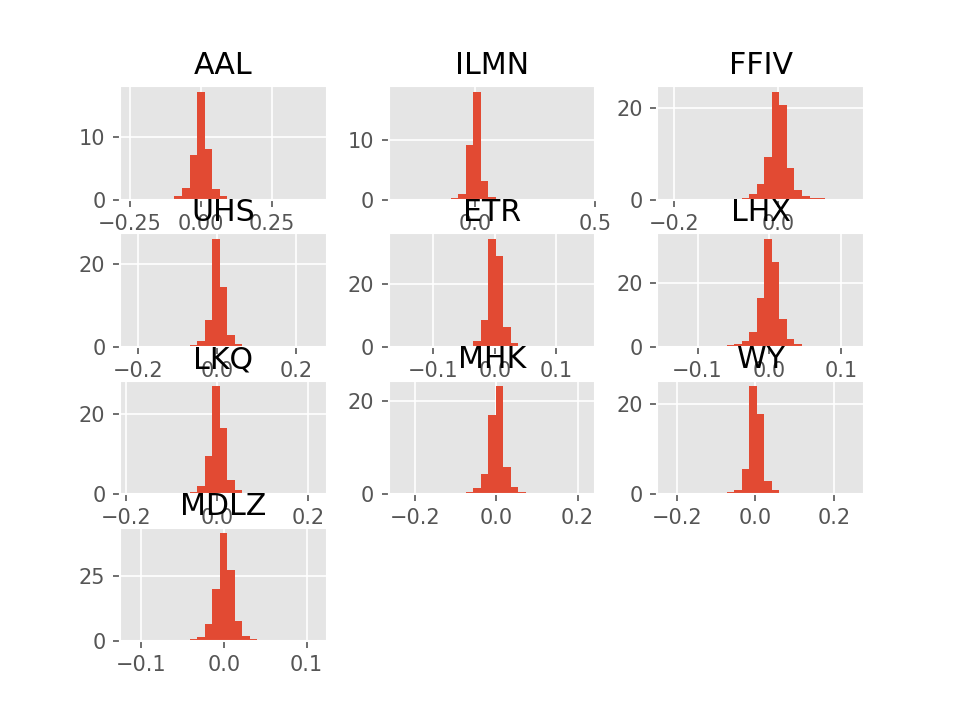

array([[<AxesSubplot: title={'center': 'AAL'}>,
        <AxesSubplot: title={'center': 'ILMN'}>,
        <AxesSubplot: title={'center': 'FFIV'}>],
       [<AxesSubplot: title={'center': 'UHS'}>,
        <AxesSubplot: title={'center': 'ETR'}>,
        <AxesSubplot: title={'center': 'LHX'}>],
       [<AxesSubplot: title={'center': 'LKQ'}>,
        <AxesSubplot: title={'center': 'MHK'}>,
        <AxesSubplot: title={'center': 'WY'}>],
       [<AxesSubplot: title={'center': 'MDLZ'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_tickers10_r.hist(bins=25, density=True)

Постройте для доходностей этих 10 бумаг ящики с усами. Для этого в опциях команды `plot` укажите `'kind'='box'`. 

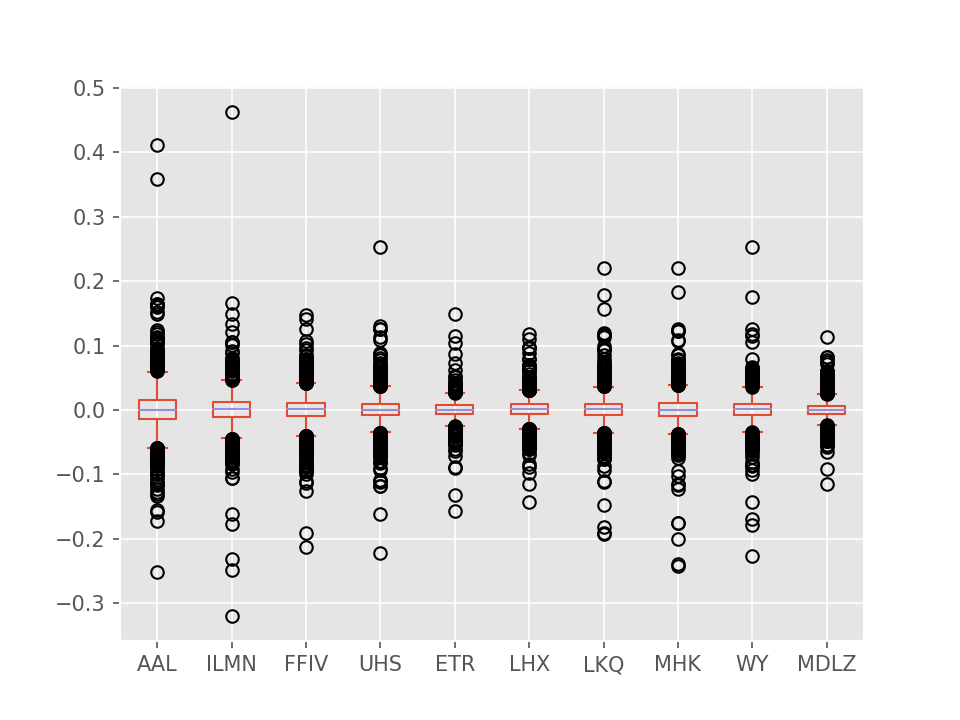

<AxesSubplot: >

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_tickers10_r.plot.box()

# your code here

__Выводы:__ 

Доходности по нашим акциям имеют распределение похожее на нормальное, но есть отличие. По ящикам с усами видно, что в данных есть довольно большое количество выбросов. Это сигнализирует о том, что у распределения доходностей хвосты оказываются более тяжёлыми, чем у нормального распределения. То есть под ними сосредоточено больше вероятностной массы и из-за этого редкое события более вероятны, чем для нормального распределения. Такую особенность финансовых данных мы более подробно будем обсуждать в будущем. 

Кроме того, по построенным визуализациям видно, что средние доходности практически для всех ценных бумаг находится близко к нулю.

__ё)__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Посчитайте для всех компаний среднюю доходность. Найдите 10 самых доходных компаний и 10 самых убыточных. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

R  = df_r.mean()           # средние доходности 
rtop_10 = R.nlargest(10)      # list из тикеров 10 самых доходных компаний отсортированный по алфавиту
rbottom_10 = R.nsmallest(10)   # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту

In [ ]:
# проверка, что задание решено корректно
assert 'DXCM' in rtop_10
assert 'SLB' in rbottom_10

Есть ли среди самых доходных компаний Тесла? :) 

__ж)__ Мы поговорили о доходности. Теперь поговорим о риске. Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. 

Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

STD  = df_r.std()           # стандартные отклонения доходностей
stdtop_10 = STD.nlargest(10)      # list из тикеров 10 самых доходных компаний отсортированный по алфавиту
stdbottom_10 = STD.nsmallest(10)   # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту

In [9]:
# проверка, что задание решено корректно
assert 'TSLA' in stdtop_10
assert 'PEP' in stdbottom_10

---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
Input In [69], in <cell line: 0>()
      1 # проверка, что задание решено корректно
      2 assert 'TSLA' in stdtop_10
----> 3 assert 'PEP' in stdbottom_10

AssertionError: 


Есть ли среди самых рискованных компаний Тесла? :) 

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Построим для наших ценных бумаг диаграмму рассеивания, на которой будет видно где по своей доходности и риску находится какая ценная бумага. 

Если вы корректно решили все предыдущие пункты, вам достаточно просто запустить код ниже и он выполнится сам. 

In [10]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data = data.join(df_inf.set_index('Symbol')['GICS Sector'])
data.fillna('another sector')
data.head()

           std         r             GICS Sector
A     0.018245  0.000808             Health Care
AAL   0.032635  0.000549             Industrials
AAP   0.020001  0.000585  Consumer Discretionary
AAPL  0.017418  0.001179  Information Technology
ABBV  0.018026  0.000873             Health Care

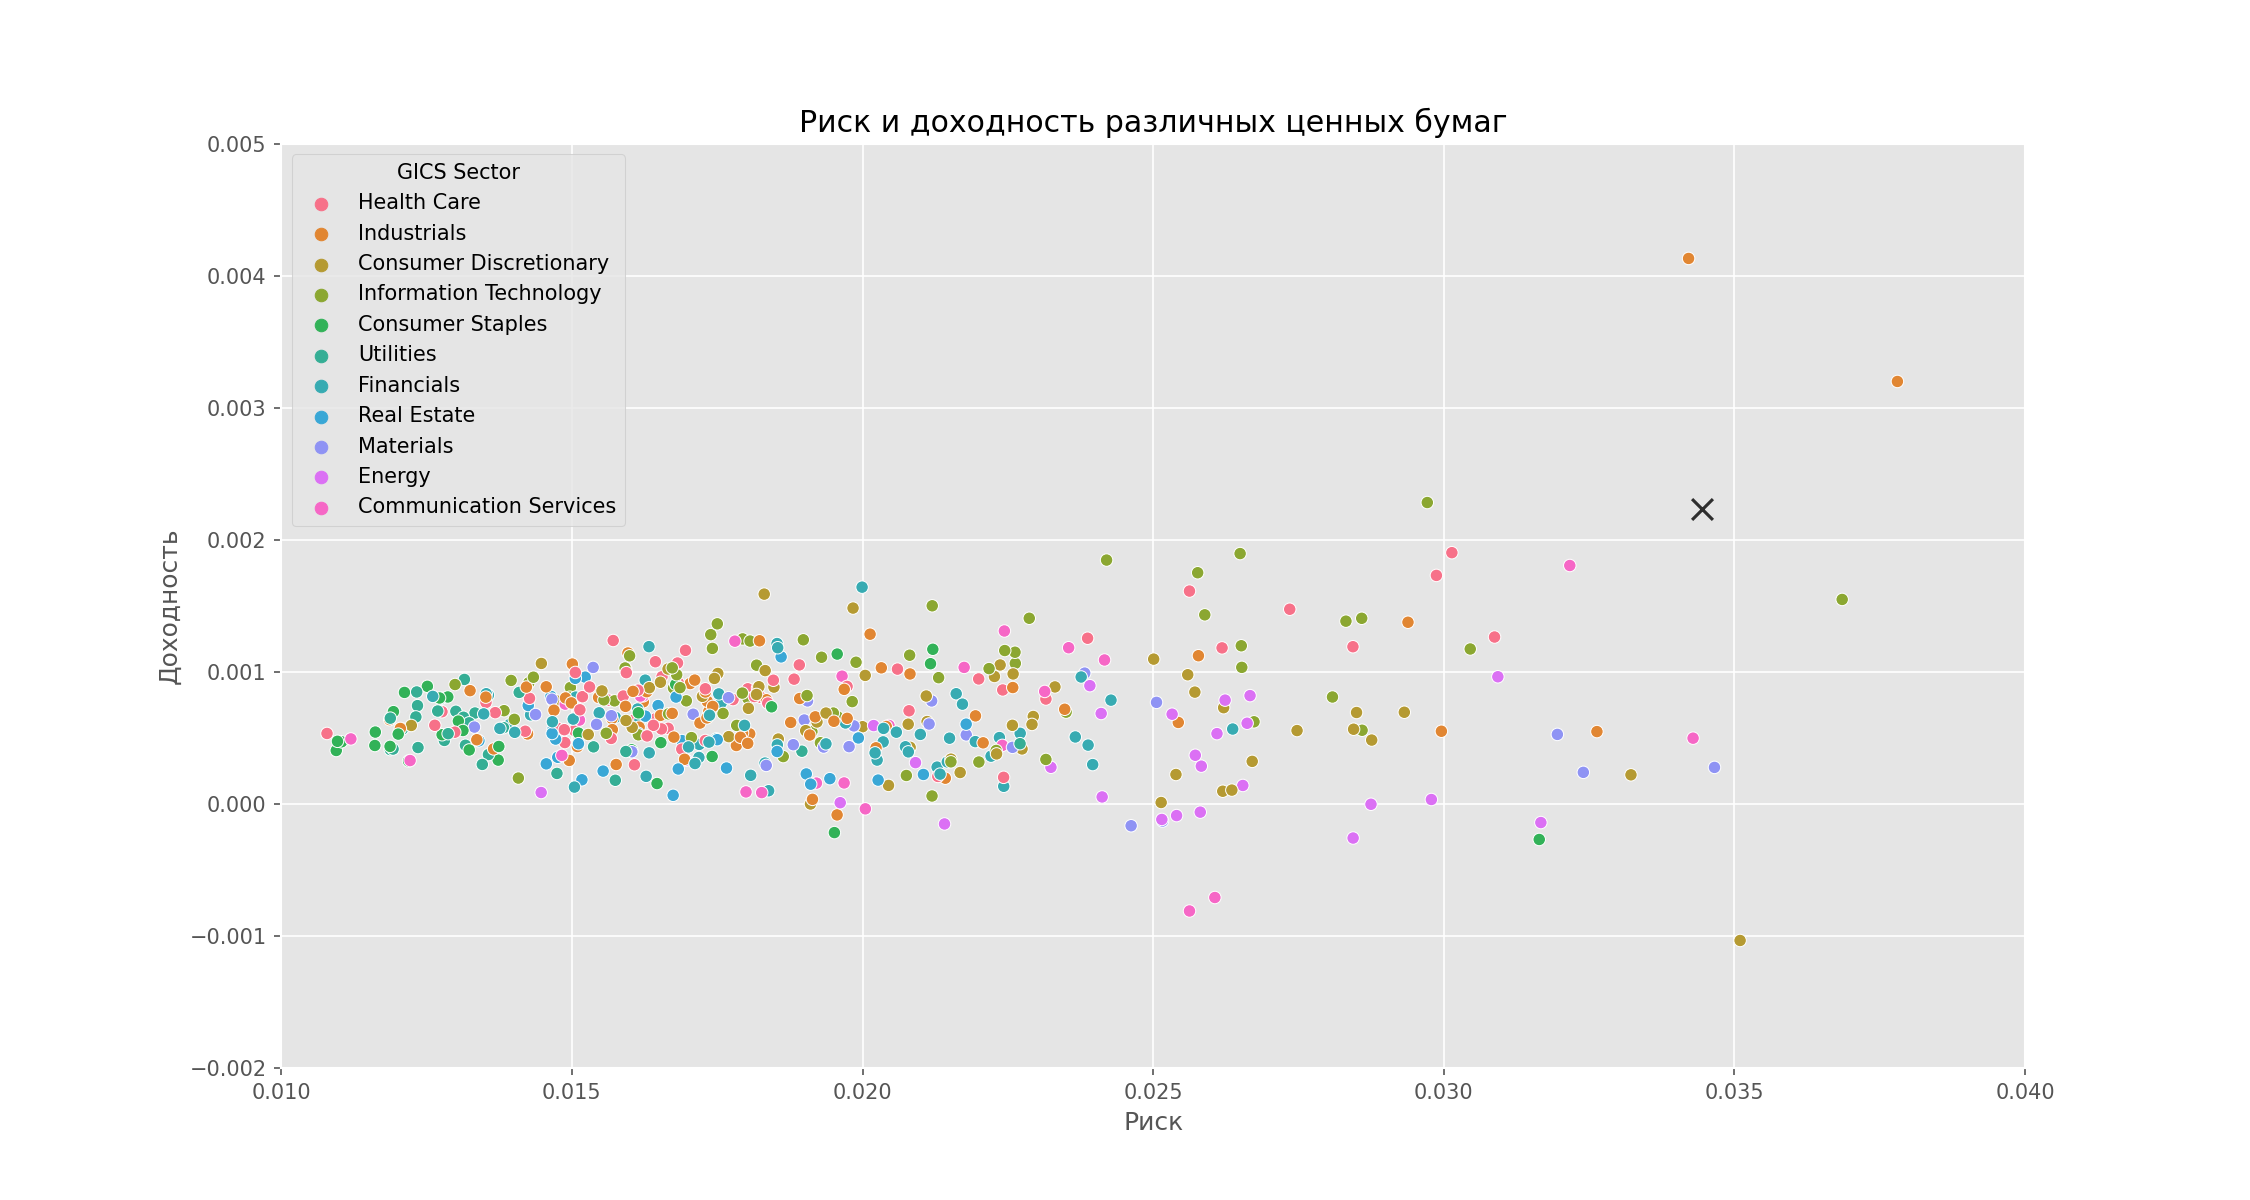

Text(0.5, 1.0, 'Риск и доходность различных ценных бумаг')

In [11]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

tsla = data.loc['TSLA']
sns.regplot(x=[tsla['std']], y=[tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='black', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ Чёрным крестиком отдельно отмечена Тесла, которая обладает довольно высокими доходностью и риском.

> Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

Сделайте группировку (`groupby`) для таблицы `data` по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_agg = data.groupby('GICS Sector')      # таблица после группировки 
min_sector = df_agg['std'].median().nsmallest(1).index[0]  # название сектора с минимальным медианным риском
max_sector = df_agg['r'].sum().nlargest(1).index[0]  # название сектора с максимальной доходностью 

In [ ]:
# проверка, что задание решено корректно
assert min_sector == 'Utilities'

__з)__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают VaR. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $VaR$.
Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ VaR по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Не забудьте умножить результаты на $-1$ перед сортировкой. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

VaR  = df_r.quantile(0.05)           # Value at risk по нашим бумагам
VaRtop_10 = VaR.nsmallest(10)      # list из тикеров 10 самых рисковых компаний отсортированный по алфавиту
VaRbottom_10 = VaR.nlargest(10)   # list из тикеров 10 самых безрисковых компаний отсортированный по алфавиту

In [ ]:
# проверка, что задание решено корректно
assert 'TSLA' in VaRtop_10 
assert 'PG' in VaRbottom_10

$VaR$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $VaR$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

__и)__  __Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $VaR$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $ES$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Сколько денег мы заработаем в $5\%$ лучших случаем к концу дня? 

__Важно:__ VaR и Es в этом пункте - отрицательные числа.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

var_tsla = VaR['TSLA']   # VaR для Теслы
es_tsla  = df_r['TSLA'][df_r['TSLA'] < var_tsla].mean()   # ES для теслы 
loss = np.abs(1000 * es_tsla)       # Потеря от 1000$
profit = np.abs(1000 * var_tsla)     # Заработок от 1000$

In [ ]:
# проверка, что задание решено корректно
assert np.abs(es_tsla + 0.073254619) < 1e-5

## Какая метрика лучше? 

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона "Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок." 

Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы. Из-за этого методы оценки риска продвинулись довольно сильно вперёд и ещё появятся в будущих домашних заданиях нашего курса. 